In [ ]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.2.0


In [ ]:
fm = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fm.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

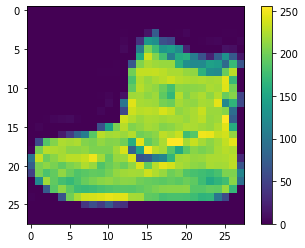

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

### 현재 0~255사이의 픽셀값 범위를 가지고 있는데 신경망 모델 주입 전에
### 이를 0~1 사이로 조정

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

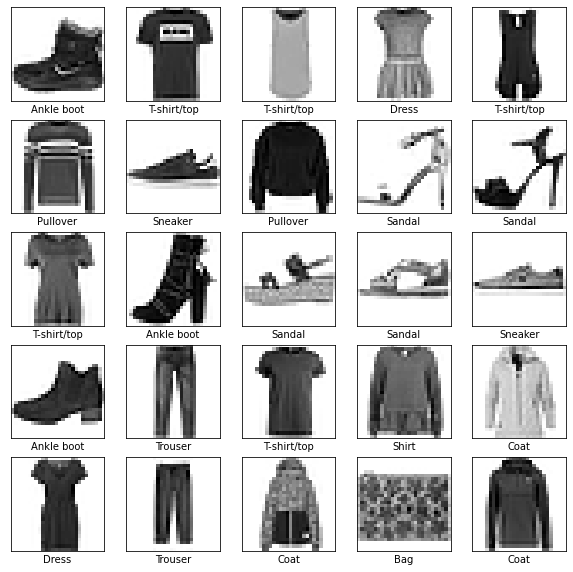

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5003 - accuracy: 0.8240
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3777 - accuracy: 0.8634
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3405 - accuracy: 0.8758
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3157 - accuracy: 0.8843
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2988 - accuracy: 0.8888


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\n test accuracy : ', test_acc)

313/313 - 0s - loss: 0.3521 - accuracy: 0.8756

 test accuracy :  0.8755999803543091


In [ ]:
predictions = model.predict(test_images)

In [ ]:
predictions[0]

array([2.0123700e-06, 1.8185434e-08, 1.8092773e-07, 1.5572407e-07,
       1.3488888e-06, 1.6286068e-02, 1.8260562e-06, 2.9034620e-02,
       1.3386330e-04, 9.5453995e-01], dtype=float32)

In [ ]:
np.argmax(predictions[0])

9

In [ ]:
test_labels[0]

9

In [ ]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color='blue'
    else:
        color='red'
    
    plt.xlabel('{} {:2.0f} ({}'.format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label],
                                       color=color))

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

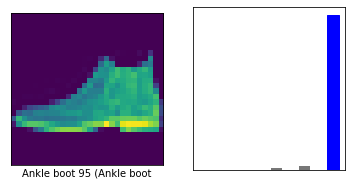

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

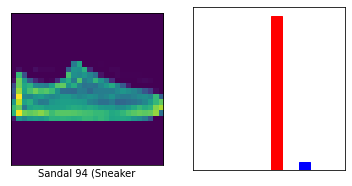

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

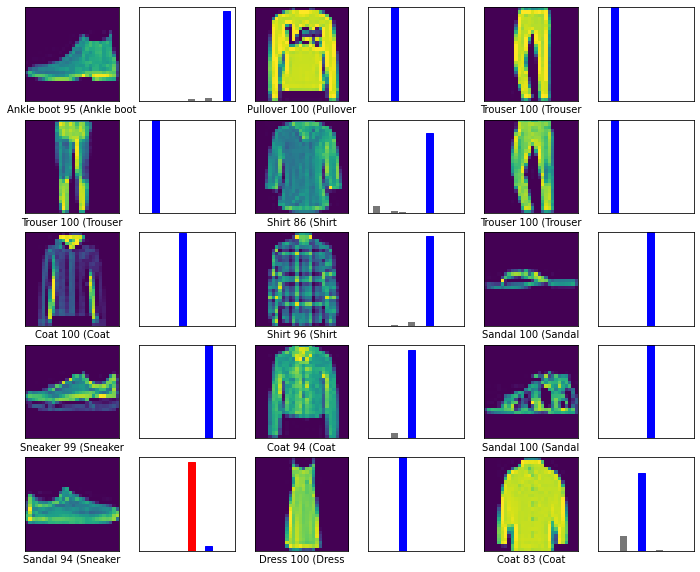

In [ ]:
# 처음 X 개의 테스트 이미지와 예측 레이블, 진짜 레이블을 출력합니다
# 올바른 예측은 파랑색으로 잘못된 예측은 빨강색으로 나타냅니다
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [ ]:
# 테스트 세트에서 이미지 하나를 선택합니다
img = test_images[0]

print(img.shape)

(28, 28)


In [ ]:
# 이미지 하나만 사용할 때도 배치에 추가합니다
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [ ]:
predictions_single = model.predict(img)

print(predictions_single)

[[2.0123700e-06 1.8185398e-08 1.8092773e-07 1.5572377e-07 1.3488888e-06
  1.6286045e-02 1.8260562e-06 2.9034590e-02 1.3386330e-04 9.5453995e-01]]


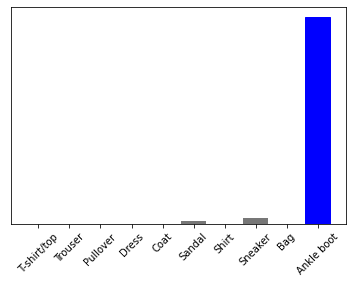

In [ ]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [ ]:
np.argmax(predictions_single[0])

9

# list comprehenshion

In [ ]:
numbers = []
for i in range(1, 11):
    numbers.append(i)
numbers

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [ ]:
x = [x for x in range(1,11)]

In [ ]:
z = [[(x,y)] for x in range(1,11) for y in range(2,12) if x % 2 ==0 | y%2 != 0]
z

[[(1, 3)],
 [(1, 5)],
 [(1, 7)],
 [(1, 9)],
 [(1, 11)],
 [(3, 3)],
 [(3, 5)],
 [(3, 7)],
 [(3, 9)],
 [(3, 11)],
 [(5, 3)],
 [(5, 5)],
 [(5, 7)],
 [(5, 9)],
 [(5, 11)],
 [(7, 3)],
 [(7, 5)],
 [(7, 7)],
 [(7, 9)],
 [(7, 11)],
 [(9, 3)],
 [(9, 5)],
 [(9, 7)],
 [(9, 9)],
 [(9, 11)]]